In [150]:
import numpy as np
from cued_sf2_lab.jpeg import diagscan

In [151]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import IPython.display
import numpy as np
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from cued_sf2_lab.laplacian_pyramid import quantise

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0.0228 1st pass
0.0251 2nd pass
0.0200 1st pass
0.0213 2nd pass
0.0253 1st pass
0.0302 2nd pass
0.0280 1st pass
0.0347 2nd pass
0.0329 1st pass
0.0406 2nd pass
0.0280 1st pass
0.0352 2nd pass
0.0277 1st pass
0.0338 2nd pass
0.0281 1st pass
0.0396 2nd pass
0.0287 1st pass
0.0347 2nd pass
0.0276 1st pass
0.0344 2nd pass
0.0273 1st pass
0.0343 2nd pass
0.0319 1st pass
0.0361 2nd pass
0.0289 1st pass
0.0342 2nd pass
0.0272 1st pass
0.0352 2nd pass
0.0276 1st pass
0.0363 2nd pass
0.0284 1st pass
0.0351 2nd pass
0.0276 1st pass
0.0346 2nd pass
0.0272 1st pass
0.0339 2nd pass
0.0294 1st pass
0.0352 2nd pass
0.0282 1st pass
0.0344 2nd pass
0.0278 1st pass
0.0338 2nd pass
0.0282 1st pass
0.0386 2nd pass
0.0281 1st pass
0.0344 2nd pass
0.0278 1st pass
0.0342 2nd pass
0.0273 1st pass
0.0341 2nd pass
0.0301 1st pass
0.0352 2nd pass
0.0274 1st pass
0.0343 2nd pass
0.0274 1st pass
0.0347 2nd pass
0.0271 1st pass
0.0350 2nd pass
0.0286 1st pass
0.0350 2nd pass
0.0282 1st pass
0.0345 2nd pass
0.0282 1

ValueError: Problem with decoding .. you might be using the wrong hufftab table

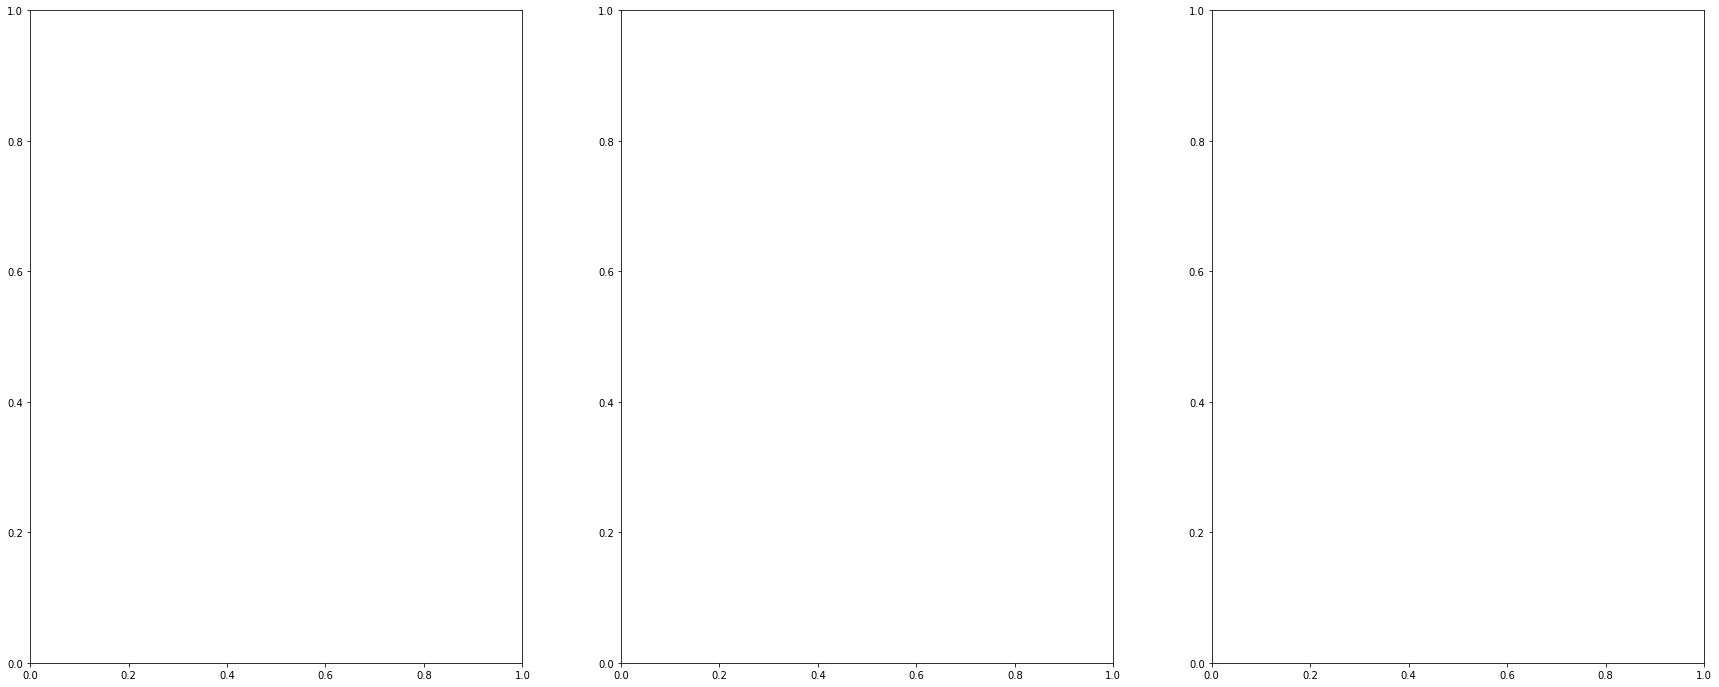

In [189]:
from compression import LBTCompression

fig, axs = plt.subplots(1, 3, figsize=(30, 12))

lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')

for i, image in enumerate([lighthouse, bridge, flamingo]):

    image = image - 128.0

    L = LBTCompression()

    Y = L.compress(image)
    (Z, h), qs = L.opt_encode(Y, size_lim=40950)
    Y = L.decode(Z, qs, hufftab=h)
    X = L.decompress(Y)
    plot_image(X, ax=axs[i])
    axs[i].set(title=f'Step = {qs:.4}, Size = {Z[:, 1].sum()}, Err = {np.std(image - X):.4}')


In [178]:
lighthouse = lighthouse -128.0

Forward 8 x 8 DCT
Quantising to step size of 1
Generating huffcode and ehuf using default tables
Coding rows
Bits for coded image = 230487
Generating huffcode and ehuf using default tables
Decoding rows
Inverse quantising to step size of 1
Inverse 8 x 8 DCT



0.42000524067549555

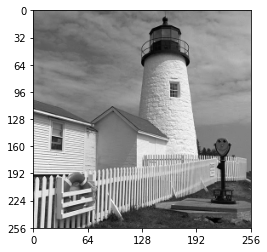

In [187]:
from cued_sf2_lab.jpeg import dwtgroup
from compression import DWTCompression

n = 3

DWT = DWTCompression(n, np.array([1]))

Y1 = DWT.compress(lighthouse)

Y = dwtgroup(Y1, n)

Z, _ = jpegenc(Y, 1, dcbits=16)

Yd = jpegdec(Z, 1, dcbits=16)

Zd = dwtgroup(Yd, -n)

Z = DWT.decompress(Zd)

plot_image(Z)

np.std(Y - Yd)
